**PREGNANCY RISK DETECTION USING MACHINE LEARNING ALGORITHMS**

BY:

* 2205289 - ISHIKA DAS

* 2205815 - KAUSHIKI MONDAL

* 22052154- SHALINI SUR

SCHOOL OF COMPUTER ENGINEERING

SECTION - CSE52

SEMESTER - 06

ACADEMIC SESSION - 2024-25





UPLOADING THE DATASET

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Pregnancy dataset.csv to Pregnancy dataset.csv


READ THE DATASET

In [2]:
import pandas as pd


df = pd.read_csv('Pregnancy dataset.csv', encoding='latin-1')

df.head()

,Patient ID,Name,Age,Body Temperature,Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI,Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Moulya,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Soni,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Baishali,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Abhilasha,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Aanaya,38,102.5,51,106,91,18.8,38,4.3,high risk


CONVERTING THE OUTCOME TO NUMERIC DATA

In [3]:
mapping = {"low risk": 0, "mid risk": 1, "high risk": 2}
df["Outcome"] = df["Outcome"].map(mapping)

In [4]:
df.drop(columns=["Name"], inplace=True)

In [5]:
df.drop(columns=["Patient ID"], inplace=True, errors="ignore")

In [6]:
correlation = df.corr()["Outcome"].abs().sort_values(ascending=False)
print(correlation)

Outcome                              1.000000
Blood Glucose(Fasting hour-mg/dl)    0.283238
Heart rate(bpm)                      0.275162
Diastolic Blood Pressure(mm Hg)      0.223379
Blood Glucose(HbA1c)                 0.193858
Age                                  0.193602
BMI                                  0.111393
Body Temperature                     0.076569
Systolic Blood Pressure(mm Hg)       0.064440
Name: Outcome, dtype: float64


SHOWING THE DISTRIBUTION OF TARGET VARIABLE

<ipython-input-7-95ec01f40e45>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


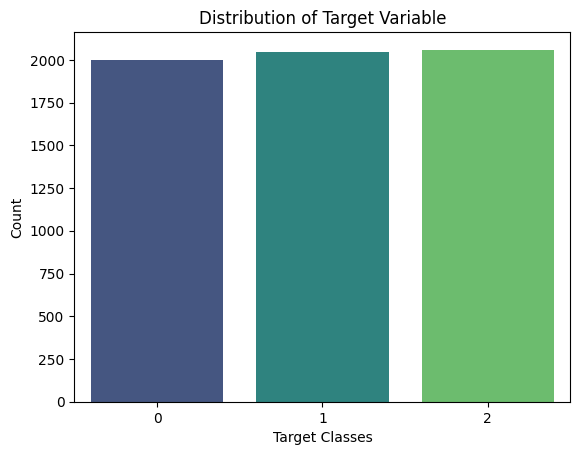

Outcome
2    2059
1    2043
0    2001
Name: count, dtype: int64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

y = df["Outcome"]

sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Target Variable")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()

target_temp = df["Outcome"].value_counts()
print(target_temp)

PIE CHART WITH REFERENCE TO THE RISK LEVEL

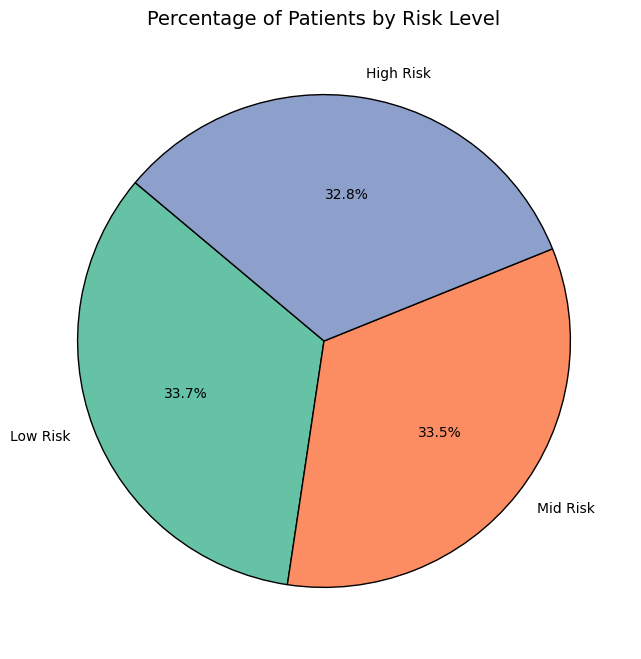

In [8]:
class_counts = df["Outcome"].value_counts()

labels = ["Low Risk", "Mid Risk", "High Risk"]
colors = ["#66c2a5", "#fc8d62", "#8da0cb"]

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title("Percentage of Patients by Risk Level", fontsize=14)

plt.show()

PLOT WITH RESPECT TO THE AGE GROUP

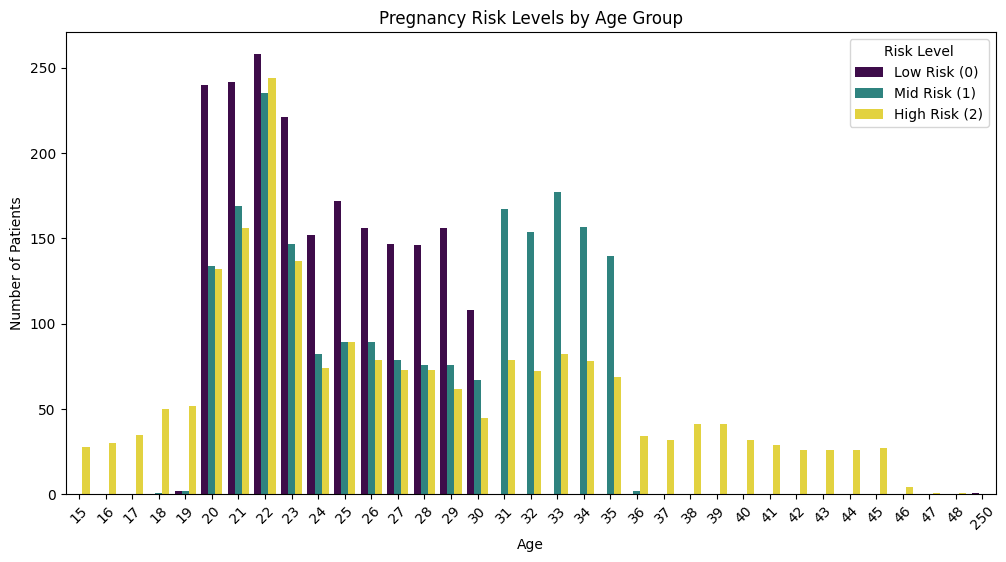

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Age", hue="Outcome", data=df, palette="viridis")

plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title("Pregnancy Risk Levels by Age Group")
plt.legend(title="Risk Level", labels=["Low Risk (0)", "Mid Risk (1)", "High Risk (2)"])
plt.xticks(rotation=45)
plt.show()

TRAINING & TESTING THE DATASET

In [10]:
from sklearn.model_selection import train_test_split

predictors = df.drop("Outcome",axis=1)
target = df["Outcome"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [11]:
X_train.shape
X_test.shape

(1221, 8)

CHECKING THE ACCURACIES OF ALL THE MODELS

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")


The accuracy score achieved using Logistic Regression is: 54.71 %


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 79.93 %


In [15]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 59.38 %


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 87.47 %


In [17]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(500):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x




dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 98.44 %


In [18]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random forest is: 99.51 %


In [19]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 54.71 %
The accuracy score achieved using Naive Bayes is: 79.93 %
The accuracy score achieved using Support Vector Machine is: 59.38 %
The accuracy score achieved using K-Nearest Neighbors is: 87.47 %
The accuracy score achieved using Decision Tree is: 98.44 %
The accuracy score achieved using Random Forest is: 99.51 %


<ipython-input-20-d7f8c3b46f44>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=scores, palette="coolwarm")


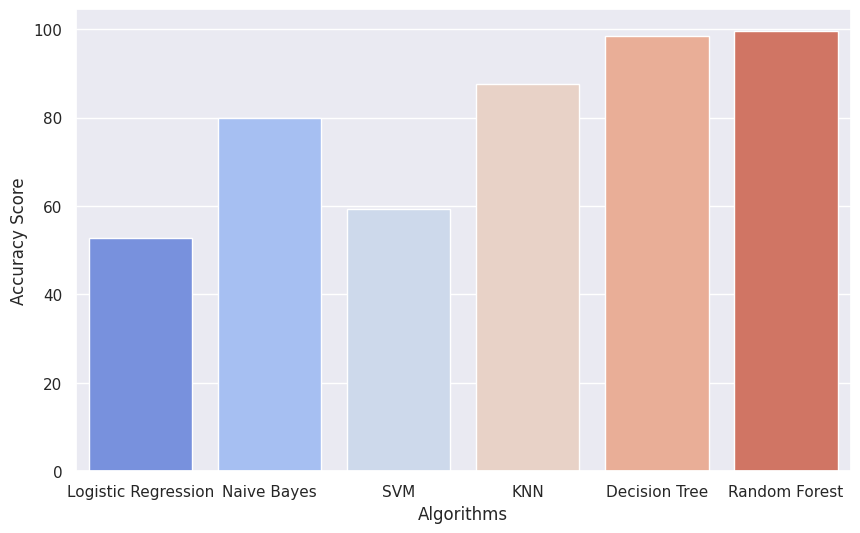

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

algorithms = ['Logistic Regression','Naive Bayes','SVM','KNN', 'Decision Tree','Random Forest']
scores = [52.71,79.93,59.3,87.47,98.44,99.51]

sns.set(rc={'figure.figsize':(10,6)})

sns.barplot(x=algorithms, y=scores, palette="coolwarm")

plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

plt.show()

CHECKING THE OTHER PERFORMANCE METRICES FOR DECISION TREE & RANDOM FOREST MODEL

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

# Decision Tree Metrics
print("Decision Tree Classification Report:\n")
print(classification_report(Y_test, Y_pred_dt, target_names=["Low Risk", "Mid Risk", "High Risk"]))

# Random Forest Metrics
print("Random Forest Classification Report:\n")
print(classification_report(Y_test, Y_pred_rf, target_names=["Low Risk", "Mid Risk", "High Risk"]))

# ROC-AUC Score (One-vs-Rest for multiclass)
dt_auc = roc_auc_score(Y_test, dt.predict_proba(X_test), multi_class='ovr')
rf_auc = roc_auc_score(Y_test, rf.predict_proba(X_test), multi_class='ovr')

print(f"Decision Tree AUC-ROC Score: {dt_auc:.2f}")
print(f"Random Forest AUC-ROC Score: {rf_auc:.2f}")


Decision Tree Classification Report:

              precision    recall  f1-score   support

    Low Risk       1.00      0.99      0.99       401
    Mid Risk       0.97      0.99      0.98       417
   High Risk       0.99      0.98      0.98       403

    accuracy                           0.98      1221
   macro avg       0.98      0.98      0.98      1221
weighted avg       0.98      0.98      0.98      1221

Random Forest Classification Report:

              precision    recall  f1-score   support

    Low Risk       1.00      1.00      1.00       401
    Mid Risk       0.99      1.00      0.99       417
   High Risk       1.00      0.99      0.99       403

    accuracy                           1.00      1221
   macro avg       1.00      1.00      1.00      1221
weighted avg       1.00      1.00      1.00      1221

Decision Tree AUC-ROC Score: 0.99
Random Forest AUC-ROC Score: 1.00


TO DEPLOY THE PROJECT

In [22]:
import joblib

joblib.dump(rf, "best_model.pkl")


['best_model.pkl']

In [23]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [28]:
!pip install streamlit pyngrok --quiet


In [51]:
from google.colab import files
uploaded = files.upload()


Saving kuddle_kick.png to kuddle_kick.png


In [161]:
%%writefile kuddle_kick_app.py
import streamlit as st
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
import pickle


st.set_page_config(page_title="Kuddle & Kick 🤱", layout="wide")


@st.cache_resource
def load_model(model_type="rf"):
    if model_type == "rf":
        return joblib.load("random_forest.pkl")
    else:
        return joblib.load("decision_tree.pkl")


pages = ["Home", "Calculation",  "About Us", "Support"]
page = st.sidebar.selectbox("Navigate", pages)


if page == "Home":
    st.markdown("<h1 style='text-align: center; color: #ff66a6;'>Kuddle & Kick🤰💖</h1>", unsafe_allow_html=True)


    col1, col2, col3 = st.columns([1, 3, 1])

    with col1:
        st.empty()

    with col2:
        try:
            st.image("kuddle_kick.png", width=350)
        except:
            st.warning("⚠️ Logo image not found. Please upload 'kuddle_kick.png'.")

        st.markdown("<div style='text-align: left; font-size: 18px; color: #ff66a6;'>An intelligent pregnancy risk detection & support system</div>", unsafe_allow_html=True)

    with col3:
        st.empty()

    st.markdown("---")

    st.markdown("### 🏠 How This Project Works:")
    st.markdown("""
    - 🔍 This app uses machine learning models to assess pregnancy risk levels (Low, Mid, High).
    - 📈 Based on health inputs, it predicts the risk and gives immediate alerts.
    - 🩺 Suggests home remedies and first aid measures for emergency cases.
    - 📁 Allows **batch predictions** via CSV upload.
    - 📊 Shows **prediction history** for reference and tracking.
    - 🤖 Includes a **support chatbot** to guide you with hospitals, remedies & ambulance services.
    """)


elif page == "Calculation":
    st.title("🤰 Pregnancy Risk Calculation")


    try:
        with open("best_model.pkl", "rb") as f:
            model = pickle.load(f)
    except FileNotFoundError:
        st.error("Model file not found! Make sure 'best_model.pkl' is in the same directory.")
        st.stop()

    st.header("🔎 Single Patient Prediction")


    with st.form("single_prediction_form"):
        age = st.slider("Age", min_value=15, max_value=50, value=25)
        temp = st.number_input("Body Temperature (°F)", min_value=90.0, max_value=110.0)
        heart_rate = st.number_input("Heart Rate (bpm)", min_value=40, max_value=200)
        sys_bp = st.number_input("Systolic Blood Pressure (mm Hg)", min_value=80, max_value=200)
        dia_bp = st.number_input("Diastolic Blood Pressure (mm Hg)", min_value=50, max_value=140)
        bmi = st.number_input("BMI", min_value=10.0, max_value=50.0)
        hba1c = st.number_input("Blood Glucose (HbA1c)", min_value=4.0, max_value=15.0)
        fasting_sugar = st.number_input("Blood Glucose (Fasting mg/dl)", min_value=50, max_value=300)

        submit = st.form_submit_button("🔍 Predict Risk")

    if submit:
        try:
            input_data = pd.DataFrame([[age, temp, heart_rate, sys_bp, dia_bp, bmi, hba1c, fasting_sugar]],
                                      columns=['Age', 'Body Temperature', 'Heart rate(bpm)',
                                               'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
                                               'BMI', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)'])

            prediction = model.predict(input_data)[0]
            category = {0: "Low Risk ✅", 1: "Mid Risk ⚠️", 2: "High Risk 🚨"}[prediction]

            st.success(f"🧠 Predicted Pregnancy Risk: **{category}**")

            if prediction == 2:
                st.warning("🚨 **Immediate Attention Required:** Lie down, stay hydrated, avoid stress, and consult a doctor.")
            elif prediction == 1:
                st.info("⚠️ **Monitor Regularly:** Maintain rest and hydration. Consider medical guidance.")


            input_data["Predicted Risk Level"] = prediction
            input_data["Risk Category"] = category
            input_data["Source"] = "Single"
            input_data.to_csv("prediction_history.csv", mode='a', index=False, header=not os.path.exists("prediction_history.csv"))

        except Exception as e:
            st.error(f"Error in prediction: {e}")

    st.header("📂 Batch Prediction")
    uploaded_file = st.file_uploader("Upload a CSV file with patient data", type=["csv"])

    if uploaded_file is not None:
        try:
            batch_data = pd.read_csv(uploaded_file, encoding='latin-1')


            required_features = ['Age', 'Body Temperature', 'Heart rate(bpm)',
                                 'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
                                 'BMI', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']

            # Check for missing required columns
            missing_cols = [col for col in required_features if col not in batch_data.columns]
            if missing_cols:
                st.error(f"❌ Missing required columns: {', '.join(missing_cols)}")
                st.stop()

            # Show warning for extra columns
            extra_cols = [col for col in batch_data.columns if col not in required_features]
            if extra_cols:
                st.warning(f"⚠️ Ignoring extra columns: {', '.join(extra_cols)}")

            # Keep only the required columns
            clean_data = batch_data[required_features]

            # Predict
            batch_predictions = model.predict(clean_data)
            batch_probs = model.predict_proba(clean_data)

            # Prepare results DataFrame
            results_df = batch_data.copy()
            results_df["Predicted Risk Level"] = batch_predictions
            results_df["Risk Category"] = results_df["Predicted Risk Level"].map({0: "Low", 1: "Mid", 2: "High"})

            # Optional: Add remedies or warning
            def remedy(risk):
                if risk == 2:
                    return "⚠️ High Risk - Consult doctor immediately.\n🛏️ Lie down, stay hydrated, and avoid stress."
                elif risk == 1:
                    return "⚠️ Mid Risk - Monitor regularly.\n🫗 Drink fluids and take adequate rest."
                else:
                    return "✅ Low Risk - Keep following a healthy lifestyle."
            results_df["Advice"] = results_df["Predicted Risk Level"].apply(remedy)

            st.success("✅ Predictions completed.")
            st.dataframe(results_df)

            # Download option
            csv_download = results_df.to_csv(index=False).encode("utf-8")
            st.download_button("⬇️ Download Results as CSV", data=csv_download, file_name="pregnancy_risk_predictions.csv", mime="text/csv")

            # Save to history
            results_df.to_csv("prediction_history.csv", index=False)

        except Exception as e:
            st.error(f"❌ An error occurred while processing the file:\n\n{e}")






elif page == "About Us":
    st.title("📖 About Kuddle & Kick")
    st.markdown("<h2 style='color: #ff66a6;'>🧩 Introduction</h2>", unsafe_allow_html=True)
    st.markdown("""

Pregnancy is a delicate and crucial phase in a woman’s life, where timely healthcare and proper monitoring can make a life-changing difference.

However, in many cases, early signs of complications often go unnoticed due to lack of awareness or access to medical support.

Kuddle & Kick is an AI-powered intelligent system designed to assess pregnancy risk levels based on vital health parameters. It not only predicts whether a pregnancy is at Low, Mid, or High risk, but also offers instant suggestions, home remedies, and connects users with nearby doctors, hospitals, and emergency services.

The goal is to empower expecting mothers and caretakers with a digital companion that ensures proactive care and peace of mind throughout the pregnancy journey..

    """)
    st.markdown("<h2 style='color: #ff66a6;'>⚠️🛠️ Challenges During Pregnancy</h2>", unsafe_allow_html=True)

    st.markdown("""

Pregnancy, while beautiful, often brings along multiple health challenges and uncertainties. Some of the most common issues that can go unnoticed or unmanaged without proper care include:

Unpredictable Risk Factors: Sudden fluctuations in blood pressure, blood sugar, or heart rate can pose serious threats to both mother and baby.

Lack of Early Warning: Many women are unaware of the warning signs of complications like gestational diabetes, preeclampsia, or anemia.

Limited Access to Healthcare: In rural or underserved areas, access to medical experts or emergency support can be delayed or unavailable.

Delayed Diagnosis: Manual evaluation of risk can often be time-consuming or inaccurate without proper tools.

Emotional Stress and Anxiety: Fear of the unknown and lack of information can cause emotional distress during pregnancy.

Overlooked Monitoring: Continuous tracking of vitals like BMI, glucose levels, or blood pressure isn’t always possible at home.

    """)
    st.markdown("<h2 style='color: #ff66a6;'>🌟 Benefits of Using Kuddle & Kick</h2>", unsafe_allow_html=True)

    st.markdown("""

Using **Kuddle & Kick** during pregnancy offers several key advantages that ensure both the mother’s and baby’s well-being. Here's how the app makes a difference:

- ✅ **Early Risk Detection**: Predicts potential pregnancy complications early using intelligent ML algorithms based on health vitals.
- ✅ **Instant Alerts & Remedies**: Provides immediate alerts for high-risk predictions along with home remedies and first-aid tips.
- ✅ **Batch & Individual Assessments**: Supports both single and batch risk analysis through direct input or CSV uploads—helpful for clinics too!
- ✅ **Support System Access**: Offers quick access to nearby doctors, hospitals, and ambulance contacts via chatbot support.
- ✅ **Accessible Anytime, Anywhere**: Can be used remotely on any device, making pregnancy monitoring easier even in underserved regions.
- ✅ **User History Tracking**: Keeps a log of previous predictions for easy monitoring and follow-ups.
- ✅ **Emotional Assurance**: Reduces anxiety by keeping users informed and guided throughout their pregnancy journey.
- ✅ **Time-Saving & Cost-Effective**: Cuts down on unnecessary hospital visits through preliminary digital screenings.



**Kuddle & Kick** acts as a personal pregnancy companion, helping expecting mothers take charge of their health confidently, with knowledge and care at their fingertips. 🤰💖

     """)

    st.markdown("<h2 style='color: #ff66a6;'>🔚 Conclusion</h2>", unsafe_allow_html=True)
    st.markdown("""


  Kuddle & Kick was developed with a deep sense of empathy and technological vision to support pregnant individuals with timely health insights and meaningful care recommendations. By combining machine learning intelligence with real-world medical parameters, the app acts as a virtual assistant to assess, inform, and empower users throughout their pregnancy journey.

It not only reduces the burden on healthcare systems by enabling pre-checks and early alerts but also serves as a companion offering comfort, guidance, and accessible support—even in emergencies.

As we move forward, Kuddle & Kick aims to evolve into a more personalized and widely accessible digital maternity companion—where every mother feels safe, heard, and cared for. 💫
    """)


elif page == "Support":
    st.markdown("<h2 style='text-align: center; color: #ff66a6;'>K & K Assistant 🤝</h2>", unsafe_allow_html=True)
    st.markdown("### Choose the type of support you need:")

    show_hospitals = st.checkbox("🏥 Find Nearby Hospitals")
    show_doctors = st.checkbox("👩‍⚕️ Contact Gynecologists")
    show_remedy_issues = st.checkbox("🤕 Facing issues / feeling sick")
    show_ambulance = st.checkbox("🚑 Emergency Ambulance Contacts")

    if show_hospitals:
        st.subheader("🏥 Hospitals near Bhubaneswar")
        st.markdown("""
        #### 📍 Recommended Hospitals:

        1. **SUM Ultimate Medicare** – *Kalinga Nagar*
           📞 [0674 710 7111](tel:+916747107111)


        2. **KIMS Hospital** – *Chandrasekharpur*
           📞 [0674 230 4400](tel:+916742304400)


        3. **Apollo Hospitals** – *Sainik School Road*
           📞 [1066](tel:1066) / [0674 666 1010](tel:+916746661010)


        4. **Care Hospitals** – *Prachi Enclave*
           📞 [90900 32222](tel:+919090032222)


        5. **Capital Hospital** – *Unit 6, Bhubaneswar*
           📞 [0674 239 2478](tel:+916742392478)

        """)

    if show_doctors:
        st.subheader("👩‍⚕️ Gynecologists near Bhubaneswar")
        st.markdown("""
        #### 👩‍⚕️ Recommended Specialists:

        1. **Dr. Lopamudra Mishra** – Apollo Hospital
           📞 [94372 89898](tel:+919437289898)

        2. **Dr. Anuradha Panda** – KIMS Hospital
           📞 [94370 63080](tel:+919437063080)

        3. **Dr. Seema Singh** – Care Hospitals
           📞 [90900 32222](tel:+919090032222)

        4. **Dr. Sudha Prasad** – SUM Ultimate Medicare
           📞 [0674 710 7111](tel:+916747107111)
        """)

    if show_remedy_issues:
        st.subheader("🩺 Select Pregnancy Complication:")
        complication = st.multiselect("Select any symptoms you're facing:", [
            "Headache", "Vomiting", "Back Pain", "Dizziness", "Swelling", "Abdominal Pain", "Fever", "Fatigue", "Nausea"
        ])

        remedies = {
            "Headache": "💡 Home Remedy: Apply a cold compress to the forehead and rest in a dark, quiet room. Avoid screen time.",
            "Vomiting": "💡 Home Remedy: Sip ginger tea or lemon water. Eat small, frequent bland meals.",
            "Back Pain": "💡 Home Remedy: Apply a warm compress. Try light prenatal yoga or gentle stretching.",
            "Dizziness": "💡 Home Remedy: Lie down on your side and drink water. Avoid sudden movements.",
            "Swelling": "💡 Home Remedy: Elevate your feet, stay hydrated, and avoid salty food.",
            "Abdominal Pain": "💡 Home Remedy: Rest, apply warm compress on sides (not directly on belly). Avoid heavy meals.",
            "Fever": "⚠️ Warning: Seek medical attention immediately.",
            "Fatigue": "💡 Home Remedy: Take short naps, eat iron-rich food like spinach, and stay hydrated.",
            "Nausea": "💡 Home Remedy: Eat dry crackers before getting up, avoid strong odors, and try ginger candy or tea."
        }

        if complication:
            for issue in complication:
                st.warning(f"⚠️ You selected: {issue}")
                st.info(remedies.get(issue, "Please consult a doctor for this issue."))

    if show_ambulance:
        st.subheader("🚑 Emergency Ambulance Contacts")
        st.markdown("""
        #### 🚨 Emergency Helpline Numbers:

        - **108 – Odisha Government Ambulance Service**
          📞 [108](tel:108)

        - **Apollo Emergency**
          📞 [1066](tel:1066)

        - **KIMS Ambulance**
          📞 [94384 43333](tel:+919438443333)

        - **SUM Hospital Ambulance**
          📞 [0674 710 7111](tel:+916747107111)
        """)




Overwriting kuddle_kick_app.py


In [162]:
from pyngrok import ngrok
ngrok.set_auth_token("2omlx5bUWtKc3tgGzD3SPXnFUGJ_4FX7SsLrmrgXDd2nY84o")
ngrok.kill()

public_url = ngrok.connect(8501, "http")
print(f"🔗 Streamlit App: {public_url}")

!streamlit run kuddle_kick_app.py &>/dev/null &


🔗 Streamlit App: NgrokTunnel: "https://be35-34-74-176-200.ngrok-free.app" -> "http://localhost:8501"
